Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0158 - loss: 0.8393 - val_accuracy: 0.0580 - val_loss: 0.2890
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0871 - loss: 0.2631 - val_accuracy: 0.1067 - val_loss: 0.1968
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1002 - loss: 0.1851 - val_accuracy: 0.1147 - val_loss: 0.1788
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1260 - loss: 0.1793 - val_accuracy: 0.1507 - val_loss: 0.1609
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1350 - loss: 0.1720 - val_accuracy: 0.1940 - val_loss: 0.1408
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1618 - loss: 0.1372 - val_accuracy: 0.1887 - val_loss: 0.1280
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1896 - loss: 0.1225 - val_accuracy: 0.2120 - val_loss: 0.1237
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2076 - loss: 0.1154 - val_accu

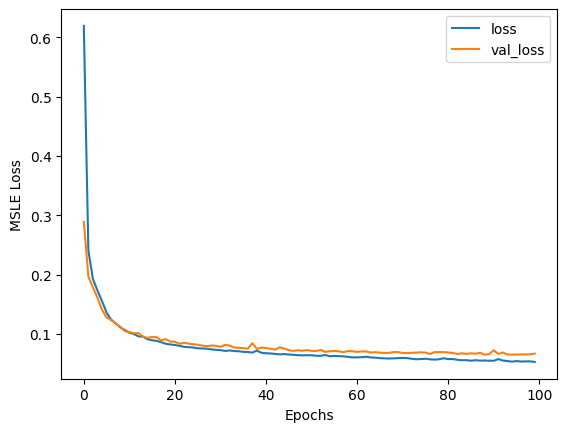

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
#Pandas: For loading and manipulating data.
# Matplotlib: For plotting the training loss and validation loss.
# TensorFlow/Keras: For building and training the neural network.
# Numpy: For numerical operations.
# Sklearn: For splitting data, scaling features, and generating evaluation metrics.


df=pd.read_csv("./ecg.csv",header=None)


X = df.drop([140], axis = 1)
y = df[140]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


encoder=Sequential([
    Input(shape=(X_train.shape[1],)), # Use x_train.shape[1] to get the number of features
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
])



decoder=Sequential([
    Input(shape=(16,)),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(X_train.shape[1],activation='linear')
])


autoencoder=Sequential([
    encoder,
    decoder
])


autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


history=autoencoder.fit(X_train,X_train,epochs=100,batch_size=32,shuffle=True,validation_data=(X_test,X_test))


test_acc,test_loss = autoencoder.evaluate(X_test, X_test)
print("Test Loss: ",test_loss)
print("Accuracy ",test_acc)


predictions=autoencoder.predict(X_test)
mse=np.mean((X_test-predictions)**2,axis=1)
threshold = np.percentile(mse, 95)
outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))



num_anomalies = np.sum(y_test[outliers] == 1)
print(f'Number of anomalies: {num_anomalies}')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()